# t-SNE with MNIST Dataset

In [1]:
## Importing required Libraries

import pandas as pd
import numpy as np

In [4]:
## Load top 5000 data.

mnist_data = pd.read_csv("D:\Machine_Learning\MNIST_Dataset\mnist_train.csv").head(5000);
mnist_data.shape

(5000, 785)

In [5]:
mnist_data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [8]:
mnist_X = mnist_data.iloc[:, 1:]
mnist_X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_Y = mnist_data.iloc[:, 0:1]
mnist_Y.head()

,label
0,5
1,0
2,4
3,1
4,9


In [10]:
## Data Standarization for t-SNE

from sklearn.preprocessing import StandardScaler

mnist_X_std = StandardScaler().fit_transform(mnist_X)
print(mnist_X_std.shape)

(5000, 784)


### Perplexity = 30 && Iteration = 1000

In [12]:
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(mnist_X_std)

In [14]:
tsne_data.shape

(5000, 2)

In [17]:
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2'))
tsne_df = pd.concat([tsne_df , mnist_Y],axis=1)
tsne_df.head()

,Dim_1,Dim_2,label
0,44.073738,-18.534557,5
1,-5.602261,-62.827454,0
2,-66.283890,0.167310,4
3,46.205219,31.102678,1
4,-48.939331,31.025467,9


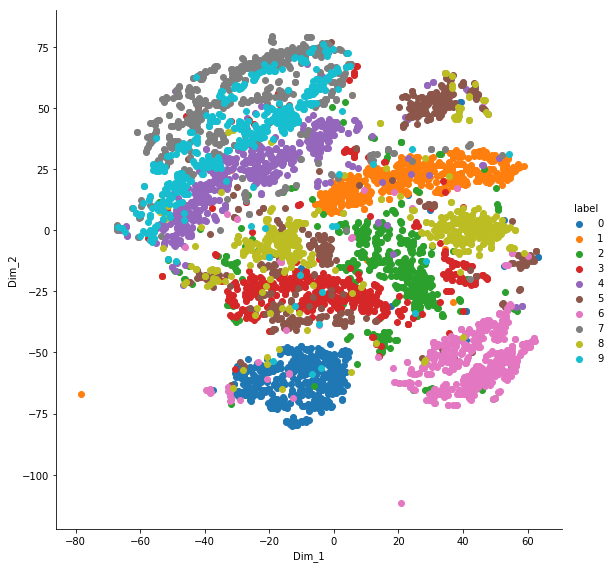

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(tsne_df, hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### Perplexity = 60 && Iteration = 5000

In [22]:
model = TSNE(n_components=2, random_state=0, perplexity=60, n_iter=5000)
tsne_data = model.fit_transform(mnist_X_std)

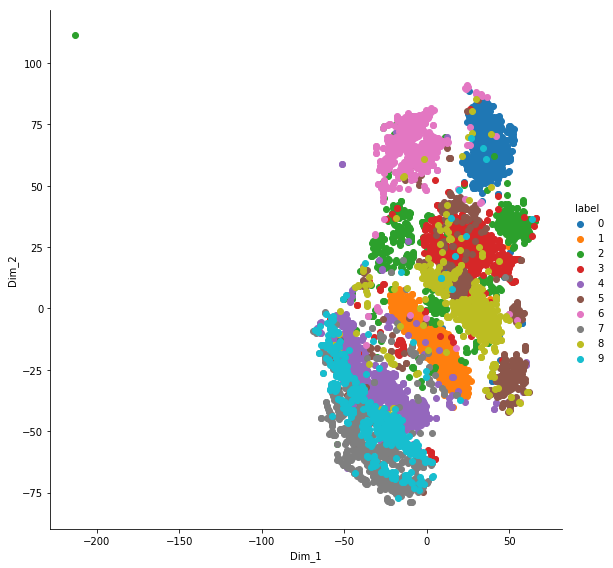

In [23]:
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2'))
tsne_df = pd.concat([tsne_df , mnist_Y],axis=1)
sns.FacetGrid(tsne_df, hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### Perplexity = 30 && Iteration = 5000

In [24]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_data = model.fit_transform(mnist_X_std)

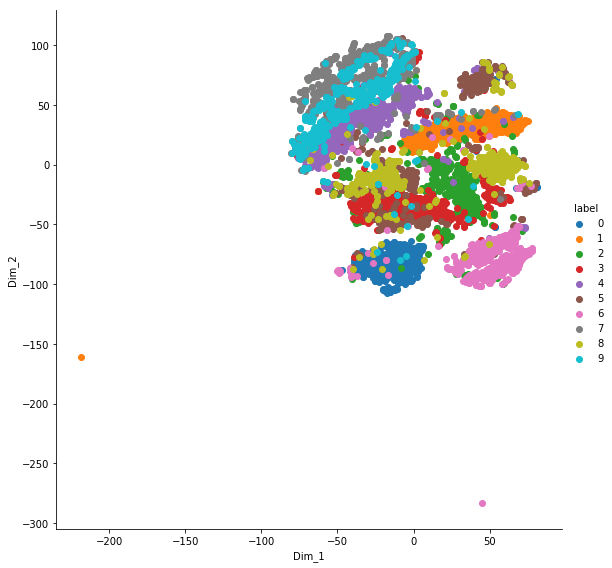

In [25]:
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2'))
tsne_df = pd.concat([tsne_df , mnist_Y],axis=1)
sns.FacetGrid(tsne_df, hue='label', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()